In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Edge()
driver.get("http://infografias.elmercurio.com/20161228-CRO-PSUcomunas/")
comunas_rm = [driver.find_elements(By.ID, "g-ai0-{id}".format(id=i))[0].text for i in (118, 119, 97)]
puntajes_rm = [driver.find_elements(By.ID, "g-ai0-{id}".format(id=i))[0].text for i in (120, 121, 98)]

In [3]:
# Ignorar elementos vacíos o ''
com = [i.split("\n") for i in comunas_rm]
pun = [i.split("\n") for i in puntajes_rm]

dict_puntajes = {
    "COM": com[0] + com[1] + com[2],
    "PUN_PSU": pun[0] + pun[1] + pun[2]
}
dict_puntajes["PUN_PSU"] = [i for i in dict_puntajes["PUN_PSU"] if i != ' ']


In [3]:
df = pd.DataFrame(dict_puntajes)

# Arreglo de los datos
df["PUN_PSU"] = df["PUN_PSU"].str.replace(",", ".")
df["PUN_PSU"] = df["PUN_PSU"].astype(float)

df["COM"] = df["COM"].apply(str.upper)
df["COM"] = df["COM"].replace("ÑUÑOA", "NUÑOA")
df["COM"] = df["COM"].replace("MACUL (33)", "MACUL")
df["COM"] = df["COM"].replace("P.A.C.", "PEDRO AGUIRRE CERDA")
df["COM"] = df["COM"].replace("EST. CENTRAL", "ESTACIÓN CENTRAL")

df.sort_values(by="COM", inplace=True)

NameError: name 'dict_puntajes' is not defined

In [ ]:
geo_rm = gpd.read_file("data/Comuna_Regi%C3%B3n_Metropolitana.zip")
geo_rm.drop(columns=["FID",	"REGION",	"NOM_REGION",	"PROVINCIA",	"NOM_PROVIN",	"COMUNA"], inplace=True)
geo_rm["NOM_COMUNA"] = geo_rm["NOM_COMUNA"].replace("ÑUÑOA", "NUÑOA")
geo_rm.sort_values(by="NOM_COMUNA", inplace=True)

In [6]:
df = df.join(geo_rm.set_index("NOM_COMUNA"), on="COM")

In [7]:
gpd_df = gpd.GeoDataFrame(df, geometry="geometry")

<Axes: >

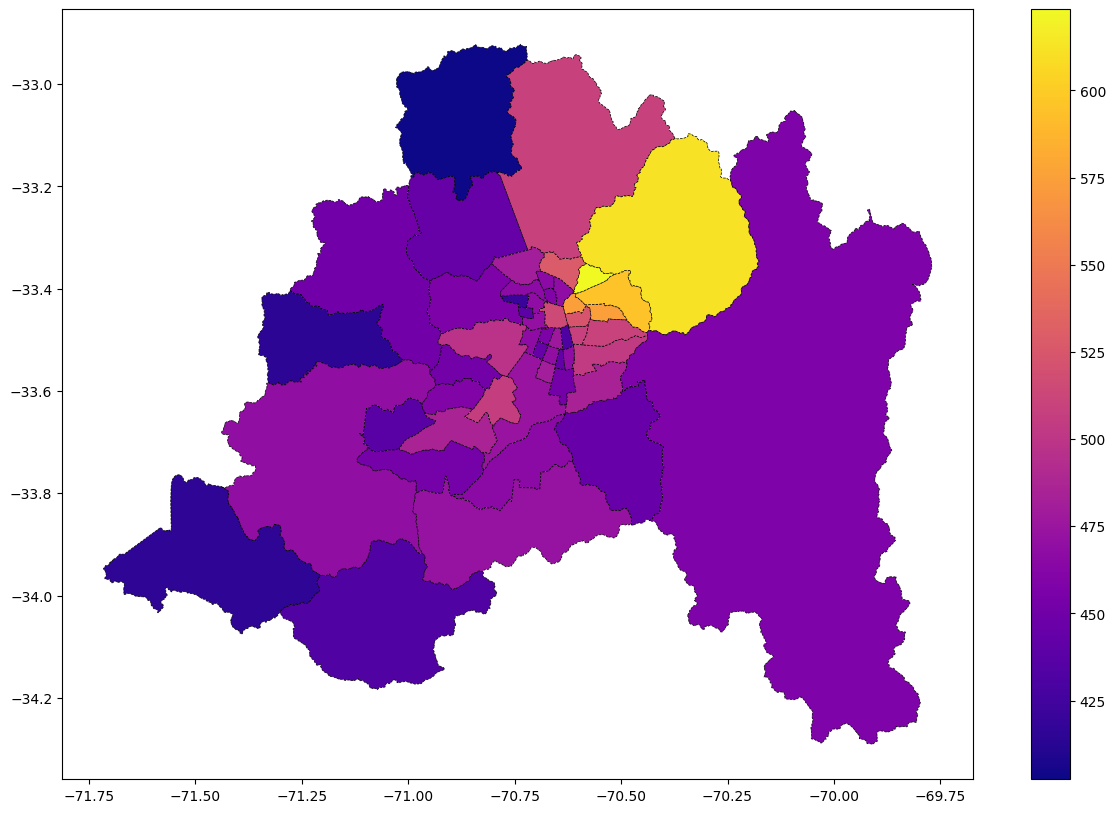

In [19]:
gpd_df.plot(column="PUN_PSU", legend=True, figsize=(15, 10), edgecolor="black", linewidth=.5, linestyle='--', cmap="plasma")

In [20]:
gpd_df.to_csv("data/psu_comunas.csv", index=False, encoding="utf-8")

In [21]:
gpd.read_file("data/psu_comunas.csv")

ValueError: GeoDataFrame does not support multiple columns using the geometry column name 'geometry'.